# Figs for poster session

In [19]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
#import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
#from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

base_dir = '/Users/shanicebailey/Documents/WMT/datasets/ECCOv4r3/cum_vol_theta_nb'


In [20]:
ls -ltrh /Users/shanicebailey/Documents/WMT/datasets/ECCOv4r3/cum_vol_theta_nb

ls: cannot access '/Users/shanicebailey/Documents/WMT/datasets/ECCOv4r3/cum_vol_theta_nb': No such file or directory


In [21]:
pwd

'/home/jovyan/WMT/ECCO-budgets'

In [22]:
base_dir = '/home/jovyan/WMT/ECCO-budgets/datasets/'
coords = xr.open_dataset(f'{base_dir}/coords_ds.nc')
ds_ts = xr.open_dataset(f'{base_dir}/ds_tns.nc')
ds_tmp = xr.open_dataset(f'{base_dir}/ds_tmp_wg.nc')
ds_velocity = xr.open_dataset(f'{base_dir}/ds_velocity.nc')
ds = xr.merge([ds_ts, ds_tmp, ds_velocity])
ds

<xarray.Dataset>
Dimensions:                  (i: 92, i_g: 93, j: 40, j_g: 41, k: 50, k_l: 50, time: 288, time_snp: 287)
Coordinates:
  * k                        (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
  * time                     (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * time_snp                 (time_snp) datetime64[ns] 1992-02-01 ... 2015-12-01
  * k_l                      (k_l) int64 0 1 2 3 4 5 6 ... 43 44 45 46 47 48 49
Dimensions without coordinates: i, i_g, j, j_g
Data variables:
    THETA                    (time, k, j, i) float32 ...
    SALT                     (time, k, j, i) float32 ...
    THETA_snp                (time_snp, k, j, i) float32 ...
    SALT_snp                 (time_snp, k, j, i) float32 ...
    dt                       (time) float64 ...
    conv_horiz_adv_flux_TH   (time, k, j, i) float32 ...
    conv_horiz_diff_flux_TH  (time, k, j, i) float32 ...
    conv_vert_adv_flux_TH    (time, k, j, i) float32 ...
    conv_vert_diff_flux_TH   (time, k, j, i) float32 ...
    surface_flux_conv_TH     (k, time, j, i) float32 ...
    sw_flux_conv_TH          (time, j, i, k) float32 ...
    theta                    (time, k, j, i) float32 ...
    total_tendency_TH_truth  (time, k, j, i) float64 ...
    UVELMASS                 (time, k, j, i_g) float32 ...
    VVELMASS                 (time, k, j_g, i) float32 ...
    WVELMASS                 (time, k_l, j, i) float32 ...
    ETAN                     (time, j, i) float32 ...

In [23]:
coords

<xarray.Dataset>
Dimensions:   (face: 13, i: 92, i_g: 93, j: 40, j_g: 41, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time_snp  (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
Dimensions without coordinates: i, i_g, j, j_g
Data variables:
    XG        (j_g, i_g) float32 ...
    dyC       (j_g, i) float32 ...
    rAz       (j_g, i_g) float32 ...
    rA        (j, i) float32 ...
    YG        (j_g, i_g) float32 ...
    dxG       (j_g, i) float32 ...
    Zp1       (k_p1) float32 ...
    YC        (j, i) float32 ...
    drF       (k) float32 ...
    hFacS     (k, j_g, i) float32 ...
    iter_snp  (time_snp) int64 ...
    PHrefF    (k_p1) float32 ...
    Z         (k) float32 ...
    hFacW     (k, j, i_g) float32 ...
    Zl        (k_l) float32 ...
    dxC       (j, i_g) float32 ...
    iter      (time) int64 ...
    rAs       (j_g, i) float32 ...
    XC        (j, i) float32 ...
    drC       (k_p1) float32 ...
    dyG       (j, i_g) float32 ...
    Zu        (k_u) float32 ...
    PHrefC    (k) float32 ...
    hFacC     (k, j, i) float32 ...
    Depth     (j, i) float32 ...
    rAw       (j, i_g) float32 ...

### Check that the terms in the budget seem to balance

In [24]:
terms = ['conv_horiz_adv_flux_TH', 'conv_horiz_diff_flux_TH',
         'conv_vert_adv_flux_TH', 'conv_vert_diff_flux_TH',
         'sw_flux_conv_TH', 'surface_flux_conv_TH']
total = sum(ds[term] for term in terms)

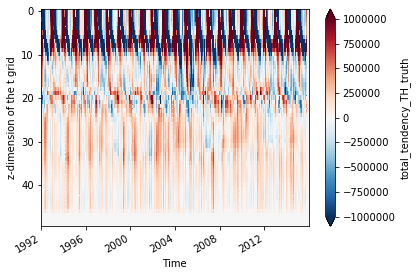

In [25]:
ds.total_tendency_TH_truth.sum(dim=['i', 'j']).plot(y='k', yincrease=False, vmax=1e6)

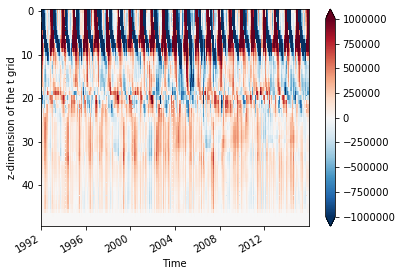

In [26]:
total.sum(dim=['i', 'j']).plot(y='k', yincrease=False, vmax=1e6)

### Check that the actual tendency of temperature balances what the budget says

(Don't match up exactly because of mismatch in time)

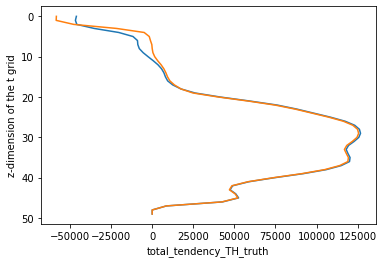

In [27]:
delta_theta = ds.THETA_snp.isel(time_snp=-1) - ds.THETA_snp.isel(time_snp=0)
total_time = (ds.time_snp[-1] - ds.time_snp[0]).astype('f8')*1e-9

vol = (coords.drF * coords.rA * coords.hFacC)
((delta_theta * vol).sum(dim=['j', 'i'])/ total_time).plot(y='k', yincrease=False)
ds.total_tendency_TH_truth.sum(dim=['j', 'i']).mean(dim='time').plot(y='k', yincrease=False)

# dV/dt == OMEGA(total_tendency_TH_truth) + R1

In [28]:
# define bins
delta_theta = 0.1
theta_bins = np.arange(-2.2, 2.2, delta_theta)
#define theta_bines for WG range

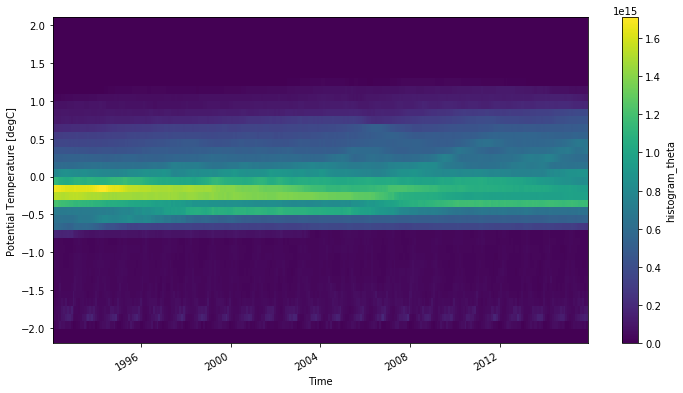

In [29]:
# theta distribution in WG region
theta_dist = histogram(ds.THETA_snp.rename('theta'), bins=[theta_bins],
                       weights=vol, dim=['i', 'j', 'k'])
theta_dist.plot(x='time_snp', figsize=(12, 6))

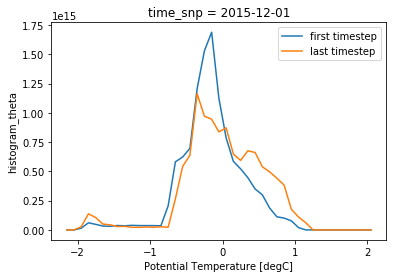

In [30]:
theta_dist[0].plot(label='first timestep')
theta_dist[-1].plot(label='last timestep')
plt.legend();

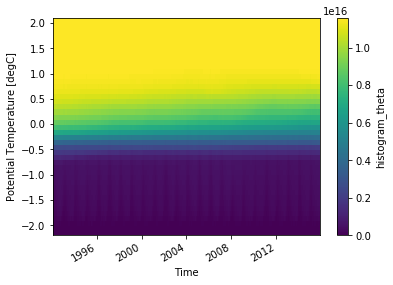

In [31]:
# cumulative volume
V = theta_dist.cumsum(dim='theta_bin')
V.transpose().plot()

In [32]:
V

<xarray.DataArray 'histogram_theta' (time_snp: 287, theta_bin: 43)>
array([[0.00000000e+00, 0.00000000e+00, 1.46708386e+13, ...,
        1.15830071e+16, 1.15830071e+16, 1.15830071e+16],
       [0.00000000e+00, 0.00000000e+00, 2.12901481e+13, ...,
        1.15830071e+16, 1.15830071e+16, 1.15830071e+16],
       [0.00000000e+00, 0.00000000e+00, 3.57785532e+13, ...,
        1.15830071e+16, 1.15830071e+16, 1.15830071e+16],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.58926535e+13, ...,
        1.15830071e+16, 1.15830071e+16, 1.15830071e+16],
       [0.00000000e+00, 0.00000000e+00, 4.82770478e+13, ...,
        1.15830071e+16, 1.15830071e+16, 1.15830071e+16],
       [0.00000000e+00, 0.00000000e+00, 2.65550236e+13, ...,
        1.15830071e+16, 1.15830071e+16, 1.15830071e+16]])
Coordinates:
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

In [33]:
delta_V = V.diff(dim='time_snp')
delta_V.coords['time'] = 'time_snp', ds.time[1:-1].values

In [34]:
delta_V

<xarray.DataArray 'histogram_theta' (time_snp: 286, theta_bin: 43)>
array([[ 0.00000000e+00,  0.00000000e+00,  6.61930948e+12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.44884051e+13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.25457309e+13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -8.40202092e+12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.23843943e+13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.17220242e+13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * time_snp   (time_snp) datetime64[ns] 1992-03-01 1992-04-01 ... 2015-12-01
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05
    time       (time_snp) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14

In [35]:
ds.dt[1:-1]

<xarray.DataArray 'dt' (time: 286)>
array([2505600., 2678400., 2592000., ..., 2592000., 2678400., 2592000.])
Coordinates:
  * time     (time) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14
Attributes:
    units:          s
    standard_name:  dt
    coordinate:     time
    long_name:      time span between snapshots

## $\frac{\partial \mathcal{V}}{\partial t}$

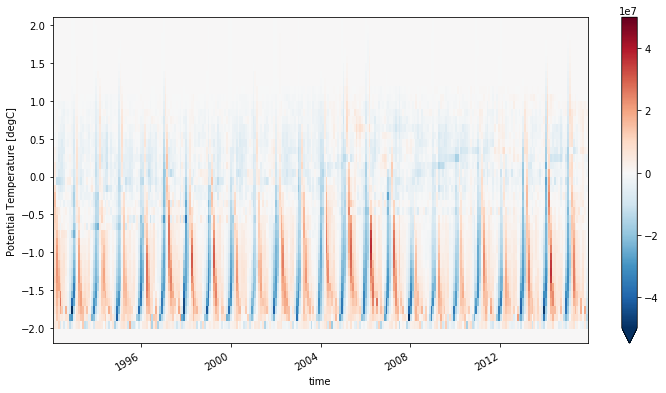

In [36]:
dVdt = delta_V.swap_dims({'time_snp': 'time'}) / ds.dt[1:-1]
dVdt.plot(x='time', figsize=(12, 6), vmax=5e7)

## $\Omega_{total}$

In [37]:
omega_total = -histogram(ds.THETA.rename('theta'), bins=[theta_bins],
                         weights=ds.total_tendency_TH_truth.fillna(0.),
                         dim=['i', 'j', 'k']) / delta_theta

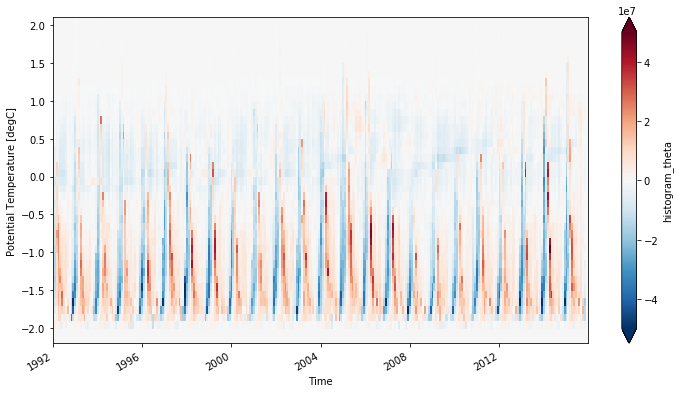

In [38]:
omega_total.plot(x='time', figsize=(12, 6), vmax=5e7)

## R1 = $\frac{\partial \mathcal{V}}{\partial t} - \Omega_{total}$ (Discretization of theta layers)

In [39]:
dVdt

<xarray.DataArray (time: 286, theta_bin: 43)>
array([[       0.        ,        0.        ,  2641806.14743295, ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,  5409350.76759857, ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,  4840173.94706173, ...,
               0.        ,        0.        ,        0.        ],
       ...,
       [       0.        ,        0.        , -3241520.41580247, ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,  4623803.1311828 , ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        , -8380410.57916049, ...,
               0.        ,        0.        ,        0.        ]])
Coordinates:
    time_snp   (time) datetime64[ns] 1992-03-01 1992-04-01 ... 2015-12-01
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05
  * time       (time) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14

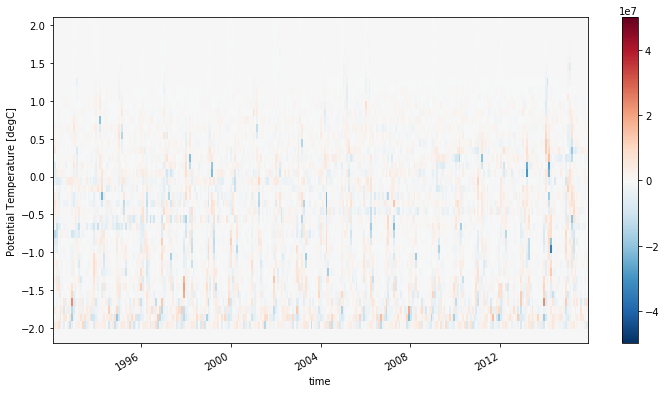

In [40]:
R1 = dVdt - omega_total[1:-1]
R1.plot(x='time', figsize=(12, 6), vmax=5e7)

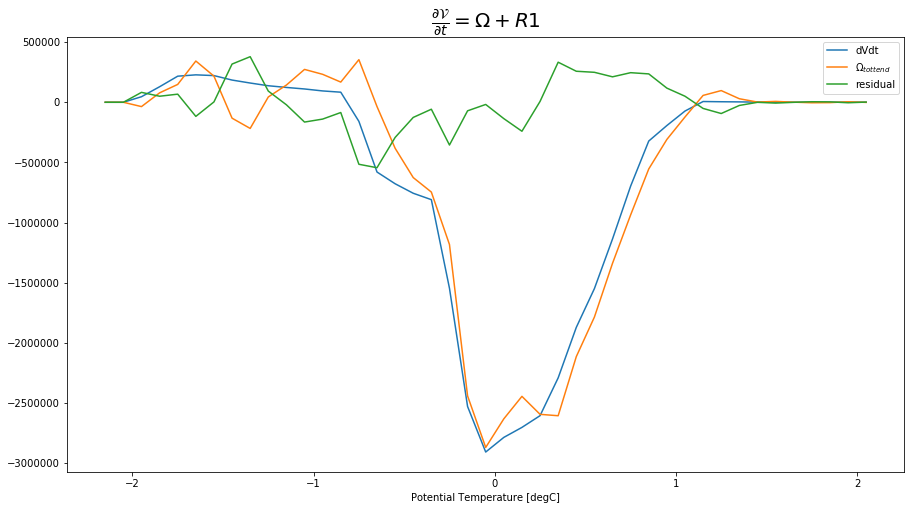

In [41]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='dVdt')
omega_total.mean(dim='time').plot(label=r'$\Omega_{tottend}$')
R1.mean(dim='time').plot(label='residual')
plt.legend()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega + R1$', fontsize=20);

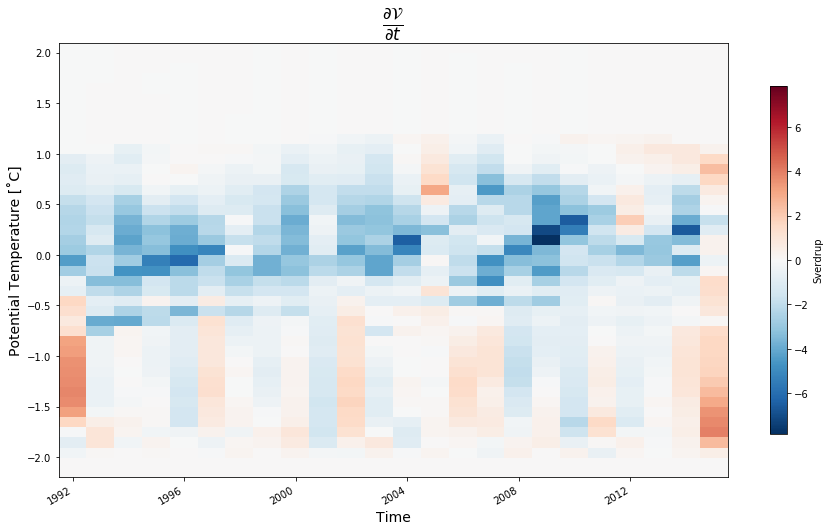

In [42]:
(dVdt/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t}$', fontsize=24);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

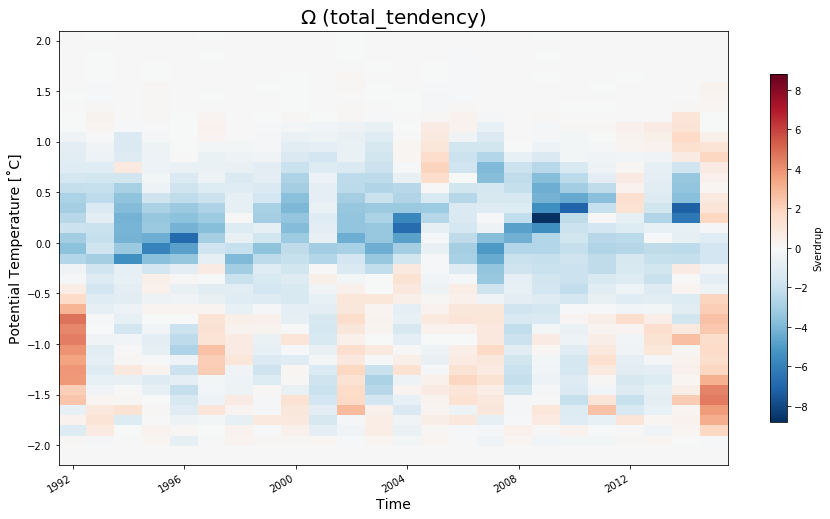

In [43]:
(omega_total[1:-1]/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Omega$ (total_tendency)', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

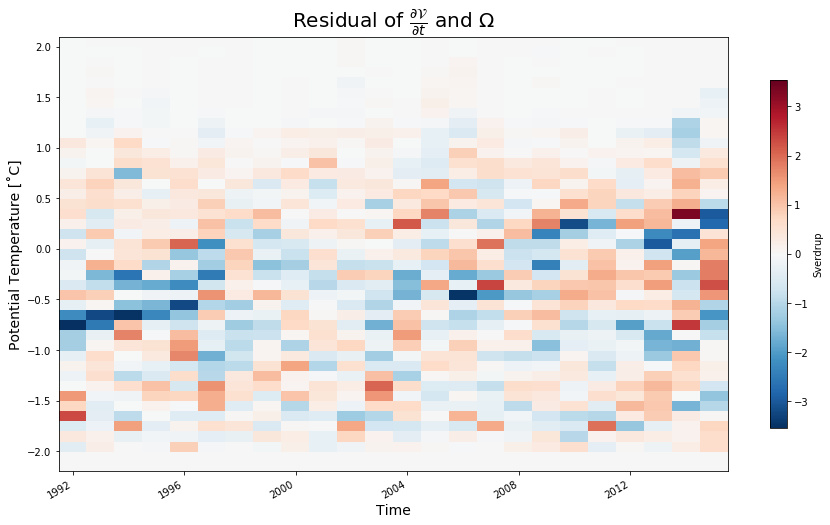

In [44]:
(R1/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'Residual of $\frac{\partial \mathcal{V}}{\partial t}$ and $\Omega$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

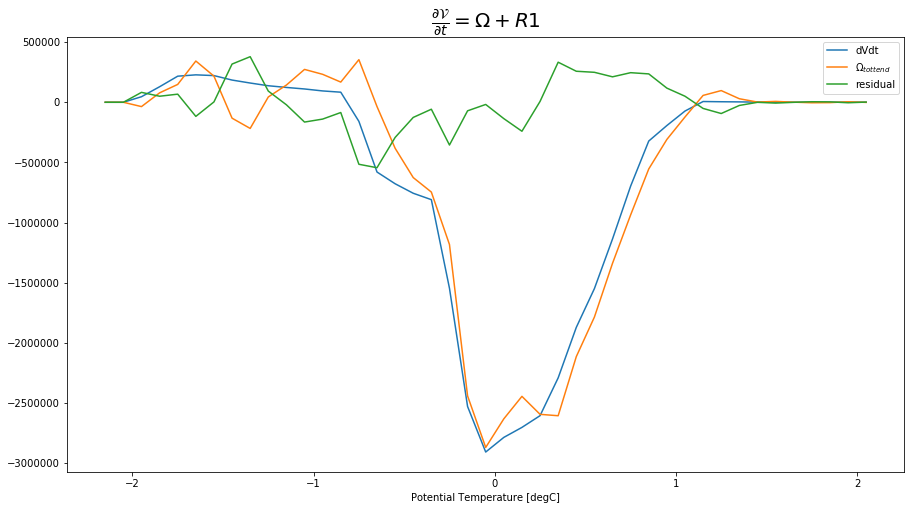

In [45]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='dVdt')
omega_total.mean(dim='time').plot(label=r'$\Omega_{tottend}$')
R1.mean(dim='time').plot(label='residual')
plt.legend()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega + R1$', fontsize=20);

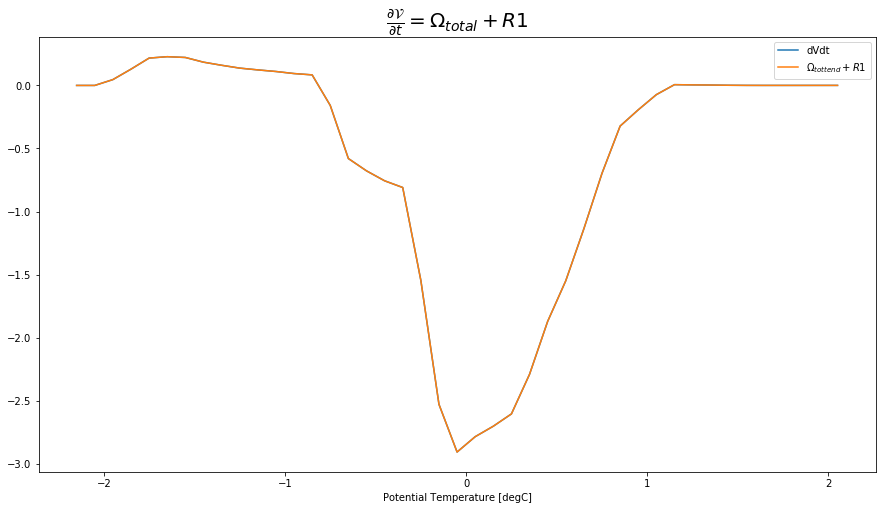

In [105]:
plt.figure(figsize=(15,8))
(dVdt/1e6).mean(dim='time').plot(label='dVdt')
((omega_total + R1)/1e6).mean(dim='time').plot(label=r'$\Omega_{tottend} + R1$')
plt.legend()
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega_{total} + R1$', fontsize=20);

### Calculate Omega ($\Omega$: transformation rate)

In [47]:
def histogram_func(variable):
    """Generalized xhistogram's histogram function 
    for adv and diff flux terms"""
    hist = histogram(ds.theta.rename('theta'), bins=[theta_bins],
              weights=variable.fillna(0.), dim=['i', 'j', 'k'])
    return hist / delta_theta

In [48]:
all_tendencies = list(ds_tmp)
all_tendencies.remove('theta')
all_tendencies

['conv_horiz_adv_flux_TH',
 'conv_horiz_diff_flux_TH',
 'conv_vert_adv_flux_TH',
 'conv_vert_diff_flux_TH',
 'surface_flux_conv_TH',
 'sw_flux_conv_TH',
 'total_tendency_TH_truth']

In [49]:
all_dsets = xr.merge([histogram_func(ds_tmp[var]).rename('OMEGA_' + var)
                      for var in all_tendencies])
all_dsets

<xarray.Dataset>
Dimensions:                        (theta_bin: 43, time: 288)
Coordinates:
  * time                           (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * theta_bin                      (theta_bin) float64 -2.15 -2.05 ... 1.95 2.05
Data variables:
    OMEGA_conv_horiz_adv_flux_TH   (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_conv_horiz_diff_flux_TH  (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_conv_vert_adv_flux_TH    (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_conv_vert_diff_flux_TH   (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_surface_flux_conv_TH     (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_sw_flux_conv_TH          (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0
    OMEGA_total_tendency_TH_truth  (time, theta_bin) float64 0.0 0.0 ... 0.0 0.0

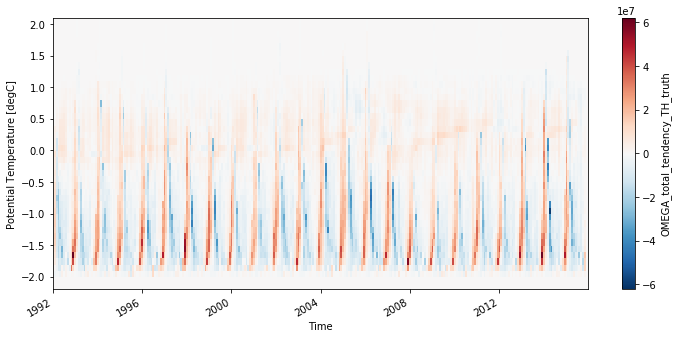

In [50]:
all_dsets.OMEGA_total_tendency_TH_truth.plot(x='time', figsize=(12, 5))

## $\Psi_{adv}$

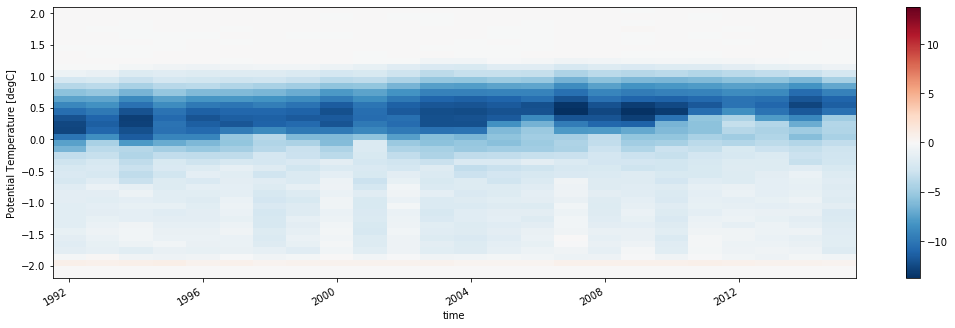

In [51]:
psi_adv = -(all_dsets.OMEGA_conv_horiz_adv_flux_TH + all_dsets.OMEGA_conv_vert_adv_flux_TH)
(psi_adv/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(18, 5))

## $\Omega_{trans-rate}$

In [52]:
omega_trans_rate = - (all_dsets.OMEGA_conv_horiz_diff_flux_TH + 
                      all_dsets.OMEGA_conv_vert_diff_flux_TH +
                      all_dsets.OMEGA_sw_flux_conv_TH + 
                      all_dsets.OMEGA_surface_flux_conv_TH)
omega_trans_rate

<xarray.DataArray (time: 288, theta_bin: 43)>
array([[      -0.        ,       -0.        ,  -510212.9802525 , ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,  2409945.66590786, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,   163631.0441488 , ...,
              -0.        ,       -0.        ,       -0.        ],
       ...,
       [      -0.        ,       -0.        ,   806098.15007944, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        , -2526622.7114782 , ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,  -830548.71791439, ...,
              -0.        ,       -0.        ,       -0.        ]])
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

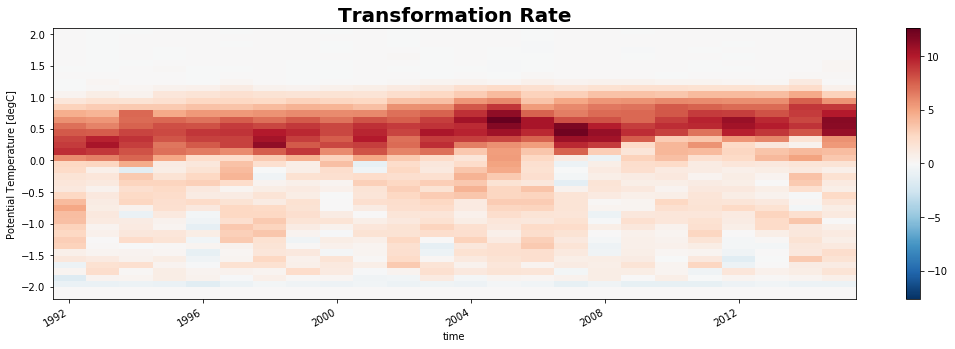

In [53]:
(omega_trans_rate.resample(time='AS').mean()/1e6).plot(x='time', figsize=(18,5))
plt.title('Transformation Rate', fontsize=20, weight='bold');

## $\Psi$

In [54]:
#this is the "dA" part of the equation
u_transport = (ds.UVELMASS * coords.dyG * coords.drF).isel(i_g=-1) #m^3/s #(-) values -> westward, (+) values -> east
v_transport = (ds.VVELMASS * coords.dxG * coords.drF).isel(j_g=-1) #m^3/s #(-) values -> south, (+) values -> north
w_transport = ds.WVELMASS.isel(k_l=0) * coords.rA #m^3/s #(-) values are massflux into the ocean, (+) values are massflux out of the ocean

In [55]:
u_transport_mean_value = u_transport.sum(dim=['j', 'k']).mean()/1e6
u_transport_mean_value

<xarray.DataArray ()>
array(-20.552632)

In [56]:
v_transport_mean_value = v_transport.mean(dim='time').sum()/1e6
v_transport_mean_value

<xarray.DataArray ()>
array(20.544308)

In [57]:
w_transport_mean_value = w_transport.mean(dim='time').sum().values
w_transport_mean_value

array(8592.012, dtype=float32)

In [58]:
residual = u_transport_mean_value + v_transport_mean_value + w_transport_mean_value
residual

<xarray.DataArray ()>
array(8592.00339475)

In [59]:
# hack theta to be on same grid pt as velocity components
theta_at_u = ds.theta.isel(i=-1)
theta_at_v = ds.theta.isel(j=-1)
theta_at_w = ds.theta.isel(k=0)

In [60]:
#this is the delta function part of the equation above
u_binned = histogram(theta_at_u, bins=[theta_bins],
                     weights=u_transport, dim=['k', 'j'])
v_binned = histogram(theta_at_v, bins=[theta_bins],
                     weights=v_transport, dim=['k', 'i'])
w_binned = histogram(theta_at_w, bins=[theta_bins],
                     weights=w_transport, dim=['i', 'j'])

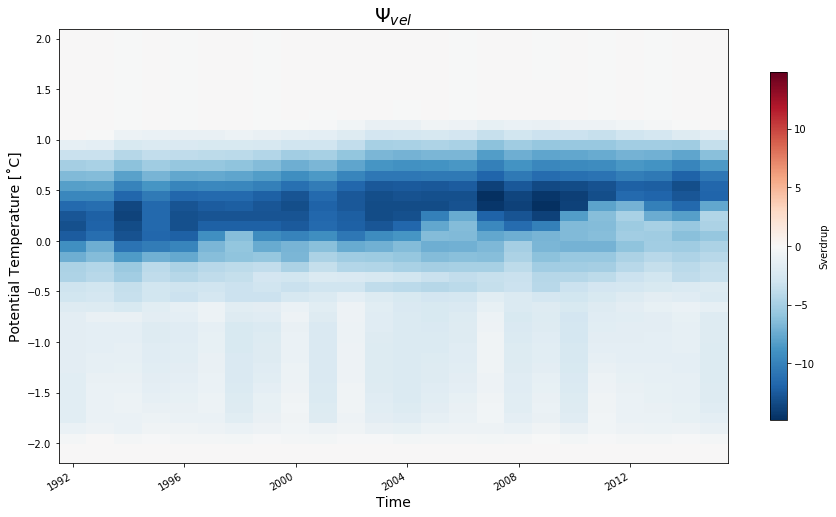

In [61]:
psi_vel = -(u_binned + v_binned).cumsum(dim='theta_bin')
(psi_vel/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Psi_{vel}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

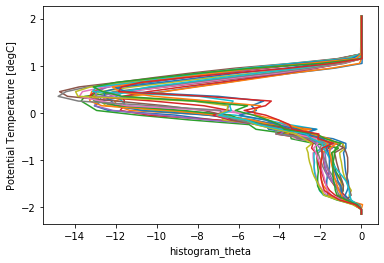

In [62]:
(psi_vel/1e6).resample(time='AS').mean(dim='time').plot.line(y='theta_bin', add_legend=False);

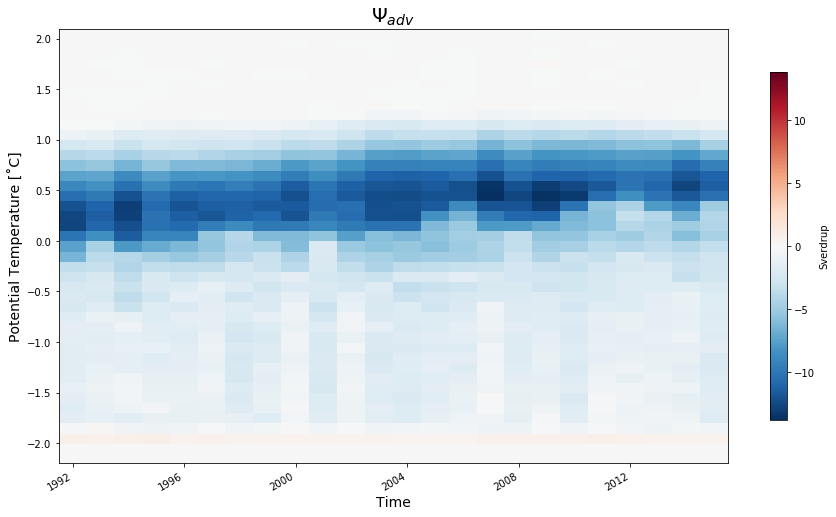

In [63]:
(psi_adv/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('$\Psi_{adv}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

## R2 = $\Psi_{adv} - \Psi_{vel}$ (Numerical Mixing)

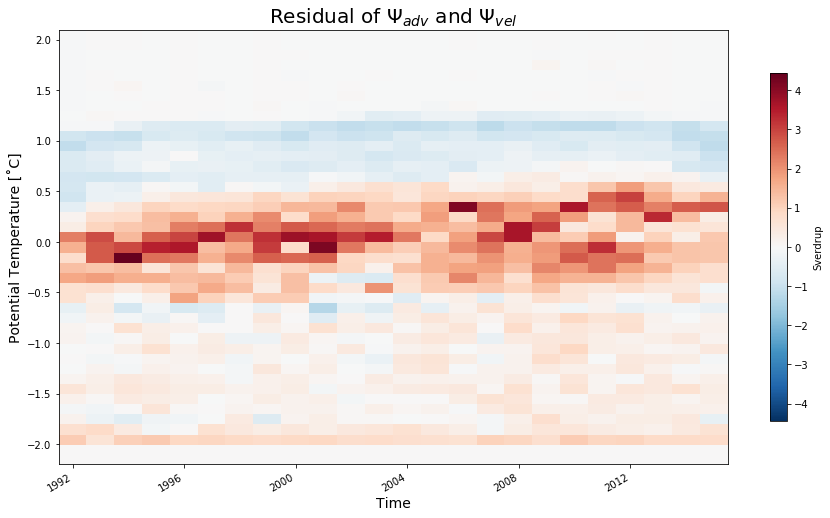

In [64]:
R2 = psi_adv - psi_vel
(R2/1e6).resample(time='AS').mean(dim='time').plot(x='time', figsize=(15,8), cbar_kwargs={'shrink': 0.8, 'label':'Sverdrup'})
plt.ylabel('Potential Temperature [˚C]', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(r'Residual of $\Psi_{adv}$ and $\Psi_{vel}$', fontsize=20);
#plt.clabel('Sverdrup [$10^{6} \frac{m^3}{s}$] ')

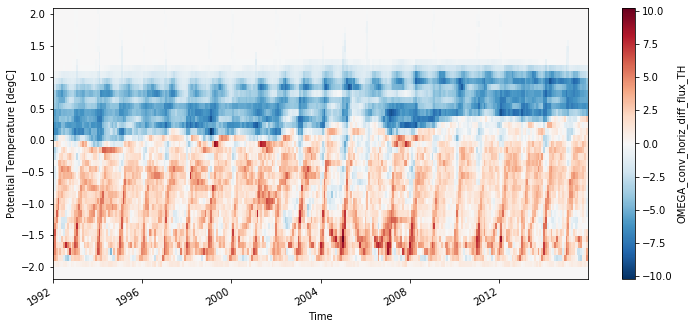

In [65]:
(all_dsets.OMEGA_conv_horiz_diff_flux_TH/1e6).plot(x='time', figsize=(12, 5))

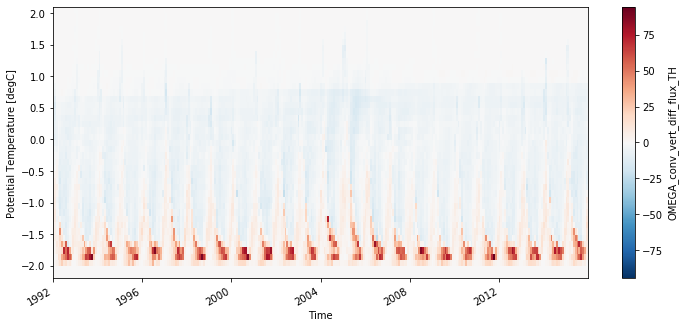

In [66]:
(all_dsets.OMEGA_conv_vert_diff_flux_TH/1e6).plot(x='time', figsize=(12, 5))

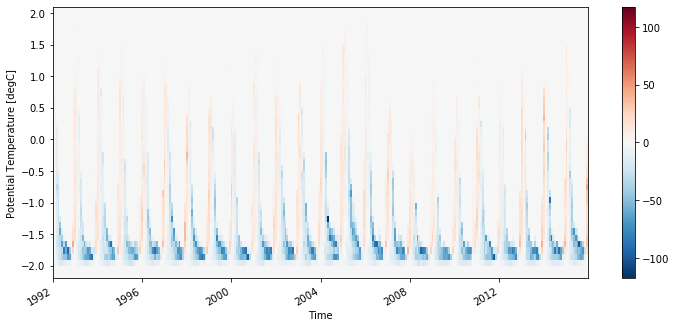

In [67]:
((all_dsets.OMEGA_surface_flux_conv_TH + all_dsets.OMEGA_sw_flux_conv_TH)/1e6).plot(x='time', figsize=(12, 5))

In [68]:
R2

<xarray.DataArray (time: 288, theta_bin: 43)>
array([[      0.        ,       0.        , -198673.43746185, ...,
          39516.05540371,   39516.05540371,   39516.05540371],
       [      0.        ,       0.        ,   66488.45651627, ...,
          19683.9925108 ,   19683.9925108 ,   19683.9925108 ],
       [      0.        ,       0.        , 1167476.95212364, ...,
           7422.01575899,    7422.01575899,    7422.01575899],
       ...,
       [      0.        ,       0.        ,   83981.45363998, ...,
         -18362.68653286,  -18362.68653286,  -18362.68653286],
       [      0.        ,       0.        ,  107553.18658829, ...,
          -4422.97934532,   -4422.97934532,   -4422.97934532],
       [      0.        ,       0.        , -180177.12921143, ...,
           1860.66237593,    1860.66237593,    1860.66237593]])
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

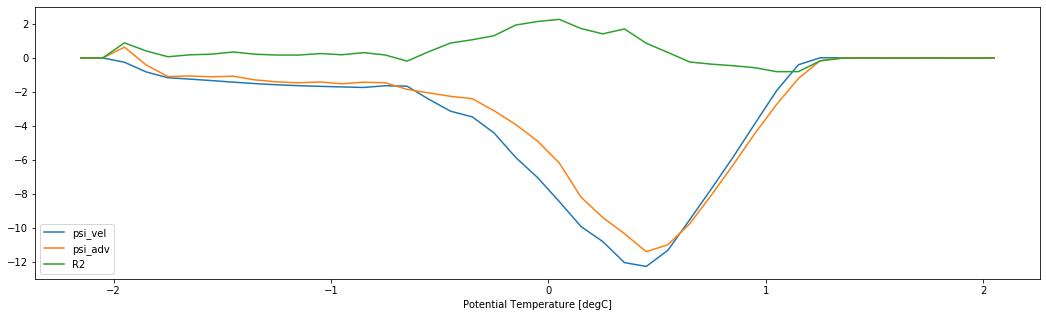

In [69]:
plt.figure(figsize=(18,5))
(psi_vel/1e6).mean(dim='time').plot(label='psi_vel')
(psi_adv/1e6).mean(dim='time').plot(label='psi_adv')
(R2/1e6).mean(dim='time').plot(label='R2')
plt.legend();

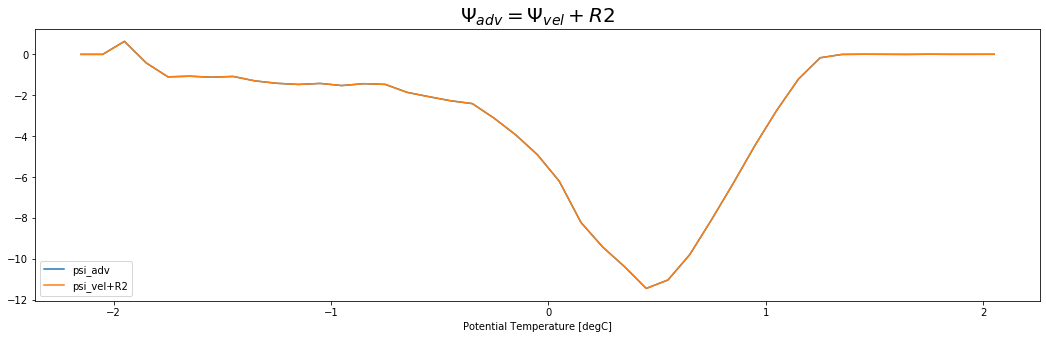

In [70]:
plt.figure(figsize=(18,5))
(psi_adv/1e6).mean(dim='time').plot(label='psi_adv')
((psi_vel+R2)/1e6).mean(dim='time').plot(label='psi_vel+R2')
plt.title(r'$\Psi_{adv} = \Psi_{vel} + R2$', fontsize=20, weight='bold')
plt.legend();

# dV/dt = $\Psi_{adv}$ + $\Omega_{trans-rate}$ + R1

In [71]:
dVdt.mean(dim='time')

<xarray.DataArray (theta_bin: 43)>
array([ 0.00000000e+00,  0.00000000e+00,  4.61830807e+04,  1.29110546e+05,
        2.16899605e+05,  2.28032922e+05,  2.21824326e+05,  1.84631459e+05,
        1.60014430e+05,  1.37418327e+05,  1.23290892e+05,  1.10595917e+05,
        9.42901204e+04,  8.38069003e+04, -1.58672281e+05, -5.79834579e+05,
       -6.77358536e+05, -7.56365996e+05, -8.09573473e+05, -1.54604584e+06,
       -2.52920781e+06, -2.90763656e+06, -2.78593023e+06, -2.70279375e+06,
       -2.60534767e+06, -2.29102097e+06, -1.87158076e+06, -1.54908593e+06,
       -1.13638596e+06, -6.96799895e+05, -3.22292163e+05, -1.93410223e+05,
       -7.29489871e+04,  6.27531547e+03,  4.38695904e+03,  3.14882214e+03,
        1.36045620e+03,  4.80789155e+02,  2.33731263e+02,  2.58839879e+02,
        2.45046573e+02,  3.26124498e+02,  2.92886534e+02])
Coordinates:
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

In [72]:
omega_trans_rate[1:-1]

<xarray.DataArray (time: 286, theta_bin: 43)>
array([[      -0.        ,       -0.        ,  2409945.66590786, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,   163631.0441488 , ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,  -111458.00116494, ...,
              -0.        ,       -0.        ,       -0.        ],
       ...,
       [      -0.        ,       -0.        , -2325388.99853983, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        ,   806098.15007944, ...,
              -0.        ,       -0.        ,       -0.        ],
       [      -0.        ,       -0.        , -2526622.7114782 , ...,
              -0.        ,       -0.        ,       -0.        ]])
Coordinates:
  * time       (time) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

(2.2, -2.2)

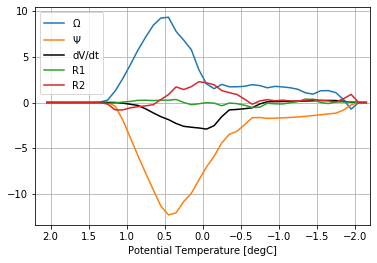

In [108]:
(omega_trans_rate[1:-1]/1e6).mean(dim='time').plot(label=r'$\Omega$')
(psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$')
(dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k')
(R1/1e6).mean(dim='time').plot(label='R1')
(R2/1e6).mean(dim='time').plot(label='R2')
plt.legend()
plt.grid()
plt.xlim(2.2, -2.2)

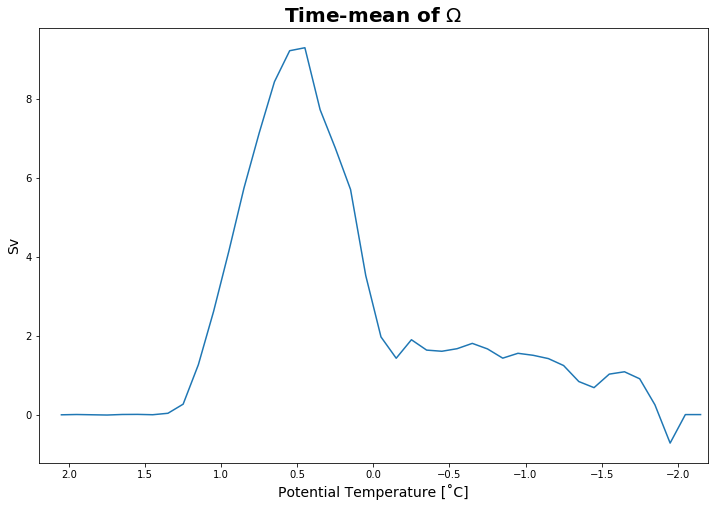

In [115]:
(omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,8))
plt.xlim(2.2,-2.2)
plt.ylabel('Sv', fontsize=14)
plt.xlabel('Potential Temperature [˚C]', fontsize=14)
plt.title(r'Time-mean of $\Omega$', fontsize=20, weight='bold');

### **Explanation:**
- If you have positive transformation in $\sigma$ bins, the water is getting lighter. So if you have positive transformation in $\theta$ bins, that means the water is getting warmer, no? And similarly, negative transformation in $\sigma$ bins means water is getting denser, so negative transformation in $\theta$ bins means water is getting colder.

(2, -2.5)

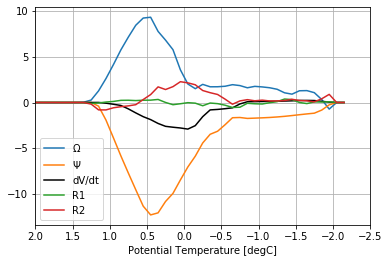

In [74]:
(omega_trans_rate[1:-1]/1e6).mean(dim='time').plot(label=r'$\Omega$')
(psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$')
(dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k')
(R1/1e6).mean(dim='time').plot(label='R1')
(R2/1e6).mean(dim='time').plot(label='R2')
plt.legend()
plt.grid()
plt.xlim(2, -2.5)

In [75]:
omega_mix = -(all_dsets.OMEGA_conv_horiz_diff_flux_TH + 
                      all_dsets.OMEGA_conv_vert_diff_flux_TH)
omega_surf = - (all_dsets.OMEGA_sw_flux_conv_TH + 
                      all_dsets.OMEGA_surface_flux_conv_TH)

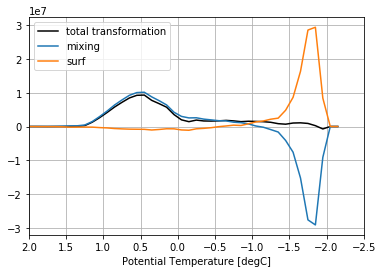

In [76]:
omega_trans_rate.mean(dim='time').plot(label='total transformation', color='k')
omega_mix.mean(dim='time').plot(label='mixing')
omega_surf.mean(dim='time').plot(label='surf')
plt.legend()
plt.grid()
plt.xlim(2, -2.5);

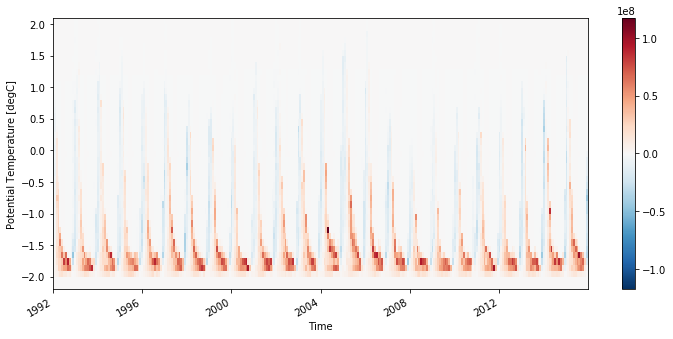

In [77]:
omega_surf.plot(x='time', figsize=(12, 5))

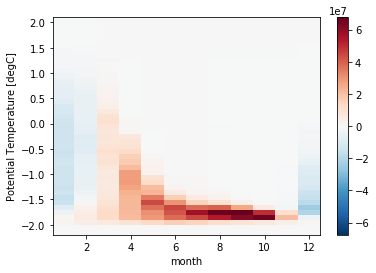

In [78]:
omega_surf.groupby('time.month').mean(dim='time').plot(x='month')

In [79]:
(R1/1e6).mean

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray (time: 286, theta_bin: 43)>
array([[ 0.        ,  0.        ,  0.14311038, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.05253994, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.8559834 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -1.44983282, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.72293026, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -5.96300039, ...,  0.        ,
         0.        ,  0.        ]])
Coordinates:
    time_snp   (time) datetime64[ns] 1992-03-01 1992-04-01 ... 2015-12-01
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05
  * time       (time) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14>

In [97]:
dVdt

<xarray.DataArray (time: 286, theta_bin: 43)>
array([[       0.        ,        0.        ,  2641806.14743295, ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,  5409350.76759857, ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,  4840173.94706173, ...,
               0.        ,        0.        ,        0.        ],
       ...,
       [       0.        ,        0.        , -3241520.41580247, ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,  4623803.1311828 , ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        , -8380410.57916049, ...,
               0.        ,        0.        ,        0.        ]])
Coordinates:
    time_snp   (time) datetime64[ns] 1992-03-01 1992-04-01 ... 2015-12-01
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05
  * time       (time) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14

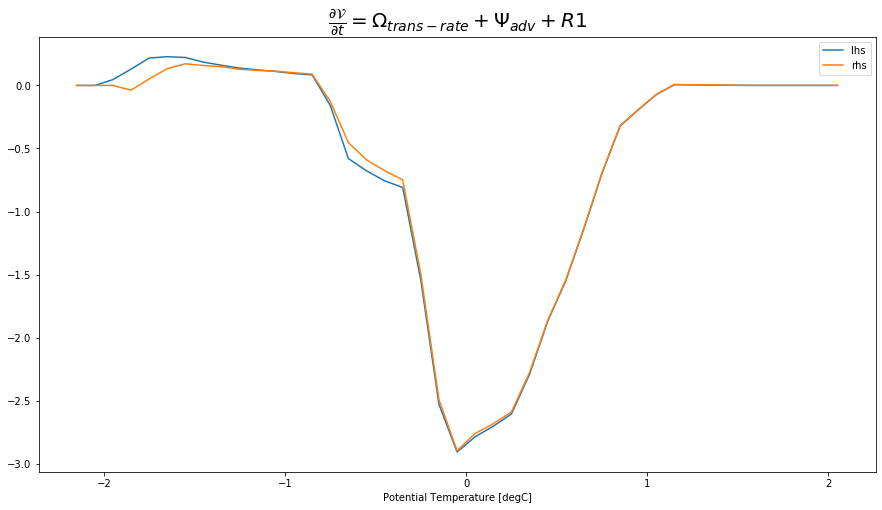

In [104]:
plt.figure(figsize=(15,8))
(dVdt/1e6).mean(dim='time').plot(label='lhs') 
((omega_trans_rate[1:-1] + R1 + psi_adv[1:-1])/1e6).mean(dim='time').plot(label='rhs')
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = \Omega_{trans-rate} + \Psi_{adv} + R1$', fontsize=20, fontweight='bold')
plt.legend();

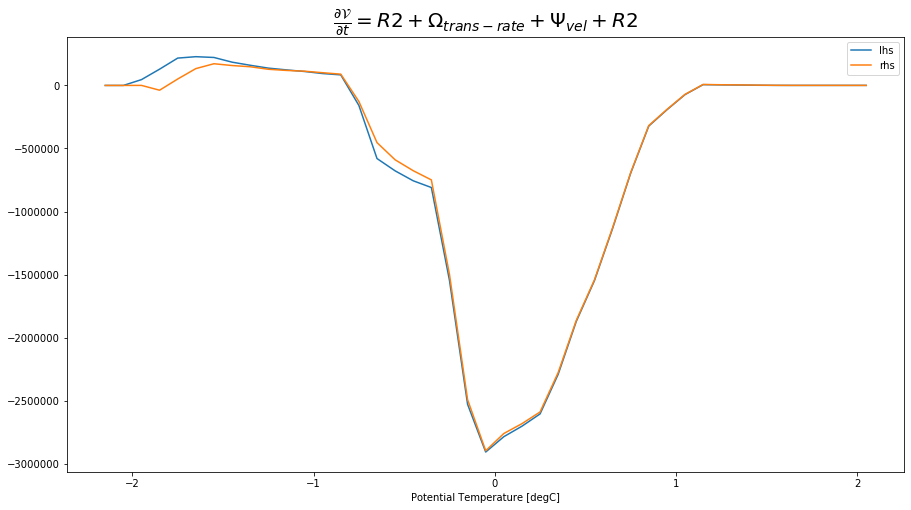

In [81]:
plt.figure(figsize=(15,8))
dVdt.mean(dim='time').plot(label='lhs') 
(omega_trans_rate + R1 + psi_vel + R2).mean(dim='time').plot(label='rhs')
plt.title(r'$\frac{\partial \mathcal{V}}{\partial t} = R2 + \Omega_{trans-rate} + \Psi_{vel} + R2$', fontsize=20, fontweight='bold')
plt.legend();

In [82]:
omega_total.isel(time=10)

<xarray.DataArray 'histogram_theta' (theta_bin: 43)>
array([-0.00000000e+00, -0.00000000e+00, -1.01296654e+06, -3.22870992e+07,
       -1.23736980e+07, -1.21057945e+07, -1.04554875e+07, -9.14540005e+06,
       -6.32156196e+06, -5.92489511e+06, -5.48200609e+06, -3.36655958e+06,
       -2.43819832e+06, -3.87638417e+06, -3.25009847e+06, -2.03698625e+06,
       -1.24258054e+06, -1.81197006e+06, -1.11717568e+06, -5.63399691e+05,
       -1.57041504e+06, -1.10571266e+05,  1.54162509e+06,  1.08126147e+06,
        1.41218777e+06,  7.68519499e+05,  5.13942041e+05,  1.35838675e+05,
       -1.66560507e+05, -1.56279436e+04, -3.30162789e+05, -6.42752059e+05,
       -1.06940838e+05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])
Coordinates:
    time       datetime64[ns] 1992-11-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

In [83]:
psi_adv.isel(time=10)

<xarray.DataArray (theta_bin: 43)>
array([      -0.        ,       -0.        ,   150356.62985802,
       -2029558.91830921, -2256097.81980515, -3286392.78038025,
       -2368952.7381134 , -2231840.54042816, -1082507.00233459,
       -3297999.93228912, -4204898.11405182, -2442134.51457977,
        -884011.56803131, -3561325.2015686 , -3785912.64167786,
       -2639468.5861969 ,   303396.01768494, -3341119.58504677,
       -3068906.31599426, -1387212.58642197, -4089262.47416973,
       -3064755.8011961 , -8152779.84327376, -9719418.5220027 ,
       -9958523.49557877, -9706257.08065033, -8224466.51205063,
       -6880627.2454071 , -5759419.23215866, -4356075.51574707,
       -2927952.99087524, -1934426.27334595,  -658280.42236328,
             -0.        ,       -0.        ,       -0.        ,
             -0.        ,       -0.        ,       -0.        ,
             -0.        ,       -0.        ,       -0.        ,
             -0.        ])
Coordinates:
    time       datetime64[ns] 1992-11-14
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

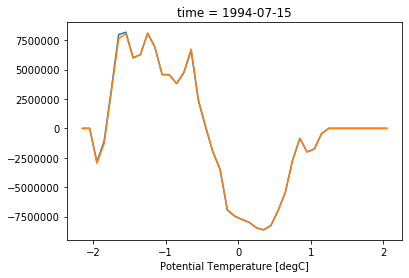

In [84]:
n = 30
omega_total.isel(time=n).plot()
(omega_trans_rate + psi_adv).isel(time=n).plot()


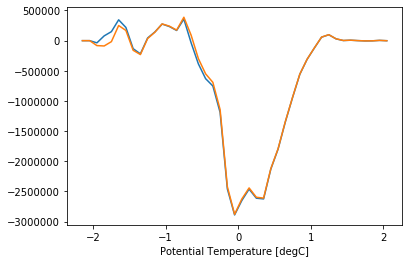

In [91]:
omega_total.isel(time=slice(1, -1)).mean(dim='time').plot()
(omega_trans_rate + psi_adv).isel(time=slice(1, -1)).mean(dim='time').plot()

In [86]:
omega_total.isel(time=0)

<xarray.DataArray 'histogram_theta' (theta_bin: 43)>
array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.])
Coordinates:
    time       datetime64[ns] 1992-01-15
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05

In [87]:
omega_trans_rate[0]

<xarray.DataArray (theta_bin: 43)>
array([       -0.        ,        -0.        ,   -510212.9802525 ,
        -6976130.7512936 , -14132071.10075533, -17128222.01663338,
       -26479352.11414713, -26212936.91703171, -22315243.38655289,
       -23223025.56303626, -24149965.24834455, -26235447.46881109,
       -19245333.85727612, -16665603.1324308 , -13453169.06964973,
       -11712470.99684244, -11826644.39490107, -19049707.65341206,
       -13568310.56958628, -14703228.40300219, -15569150.10329664,
       -12086088.64181122,  -8596318.68312357,  -9012947.79940613,
        -5851638.37724961,   2113383.9685531 ,   4838733.84404045,
         6055479.35578644,   4612927.03356944,   3398720.9350282 ,
         1973668.72159615,   1254540.87556943,    223915.54509699,
              -0.        ,        -0.        ,        -0.        ,
              -0.        ,        -0.        ,        -0.        ,
              -0.        ,        -0.        ,        -0.        ,
              -0.        ])
Coordinates:
    time       datetime64[ns] 1992-01-15
  * theta_bin  (theta_bin) float64 -2.15 -2.05 -1.95 -1.85 ... 1.85 1.95 2.05